<a href="https://colab.research.google.com/github/fridaruh/taller_citi/blob/master/Taller_citi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introducción Python

Asignación de valores a variables

In [ ]:
a = 20

In [ ]:
a

20

In [ ]:
b= 300

In [ ]:
a+b

320

In [ ]:
a = 50

In [ ]:
a+b

350

In [ ]:
saludo = 'Hola mundo'

In [ ]:
saludo

'Hola mundo'

**Listas**

In [ ]:
lista = [15, 'Daniela', True]

In [ ]:
lista[0]

15

# Importando librerías

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

Carga del archivo al espacio de trabajo

In [ ]:
df = pd.read_csv('/ruta/income.csv')

# Explorando el dataset

In [ ]:
df.head()

,Unnamed: 0,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,income_bi
0,0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0
1,1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0
2,2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0
3,3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0
4,4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K,0


Distribución por sexo

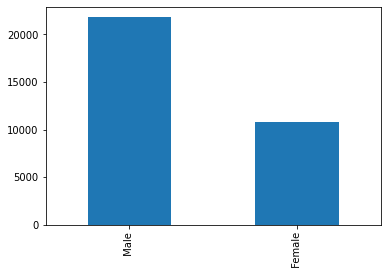

In [ ]:
df['sex'].value_counts().plot(kind='bar')

In [ ]:
df.columns

Index(['Unnamed: 0', 'age', 'workclass', 'fnlwgt', 'education',
       'education-num', 'marital-status', 'occupation', 'relationship', 'race',
       'sex', 'capital-gain', 'capital-loss', 'hours-per-week',
       'native-country', 'income', 'income_bi'],
      dtype='object')

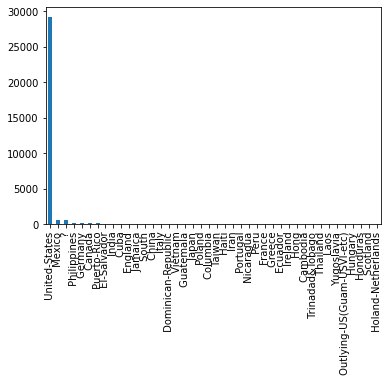

In [ ]:
df['native-country'].value_counts().plot(kind='bar')

# Transformación del dataset

Eliminamos las columnas que no ocuparemos

In [ ]:
df = df.drop(['Unnamed: 0','fnlwgt','capital-gain', 'capital-loss','income','native-country'], axis=1)

In [ ]:
df.columns

Index(['age', 'workclass', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'hours-per-week',
       'income_bi'],
      dtype='object')

In [ ]:
df.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,income_bi
0,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,0
1,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,0
2,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,0
3,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,0
4,37,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,40,0


In [ ]:
df['marital-status'].unique()

array([' Married-civ-spouse', ' Divorced', ' Married-spouse-absent',
       ' Never-married', ' Separated', ' Married-AF-spouse', ' Widowed'],
      dtype=object)

**Definición de variable objetivo**

Voy a definir la variable a predecir "Y"

In [ ]:
Y = df['income_bi']

**Variables dummies**

In [ ]:
df = pd.get_dummies(df, columns=['workclass','education','marital-status','occupation','relationship','race','sex'])

In [ ]:
df.columns

Index(['age', 'education-num', 'hours-per-week', 'income_bi', 'workclass_ ?',
       'workclass_ Federal-gov', 'workclass_ Local-gov',
       'workclass_ Never-worked', 'workclass_ Private',
       'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc',
       'workclass_ State-gov', 'workclass_ Without-pay', 'education_ 10th',
       'education_ 11th', 'education_ 12th', 'education_ 1st-4th',
       'education_ 5th-6th', 'education_ 7th-8th', 'education_ 9th',
       'education_ Assoc-acdm', 'education_ Assoc-voc', 'education_ Bachelors',
       'education_ Doctorate', 'education_ HS-grad', 'education_ Masters',
       'education_ Preschool', 'education_ Prof-school',
       'education_ Some-college', 'marital-status_ Divorced',
       'marital-status_ Married-AF-spouse',
       'marital-status_ Married-civ-spouse',
       'marital-status_ Married-spouse-absent',
       'marital-status_ Never-married', 'marital-status_ Separated',
       'marital-status_ Widowed', 'occupation_ ?', '

Quitamos la variable objetivo del dataset

In [ ]:
X = df.drop(['income_bi'], axis=1)

In [ ]:
X.columns

Index(['age', 'education-num', 'hours-per-week', 'workclass_ ?',
       'workclass_ Federal-gov', 'workclass_ Local-gov',
       'workclass_ Never-worked', 'workclass_ Private',
       'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc',
       'workclass_ State-gov', 'workclass_ Without-pay', 'education_ 10th',
       'education_ 11th', 'education_ 12th', 'education_ 1st-4th',
       'education_ 5th-6th', 'education_ 7th-8th', 'education_ 9th',
       'education_ Assoc-acdm', 'education_ Assoc-voc', 'education_ Bachelors',
       'education_ Doctorate', 'education_ HS-grad', 'education_ Masters',
       'education_ Preschool', 'education_ Prof-school',
       'education_ Some-college', 'marital-status_ Divorced',
       'marital-status_ Married-AF-spouse',
       'marital-status_ Married-civ-spouse',
       'marital-status_ Married-spouse-absent',
       'marital-status_ Never-married', 'marital-status_ Separated',
       'marital-status_ Widowed', 'occupation_ ?', 'occupation_ A

# Train, test, split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=99)

**Entrenamiento**

In [ ]:
t = tree.DecisionTreeClassifier( criterion='entropy', max_depth=3) 

In [ ]:
model = t.fit(x_train, y_train)

In [ ]:
model.score(x_train, y_train) #Calificacion 3 ramas

0.8215601965601965

**Gráfica del árbol de decisión**

In [ ]:
dimensiones = (25,25)

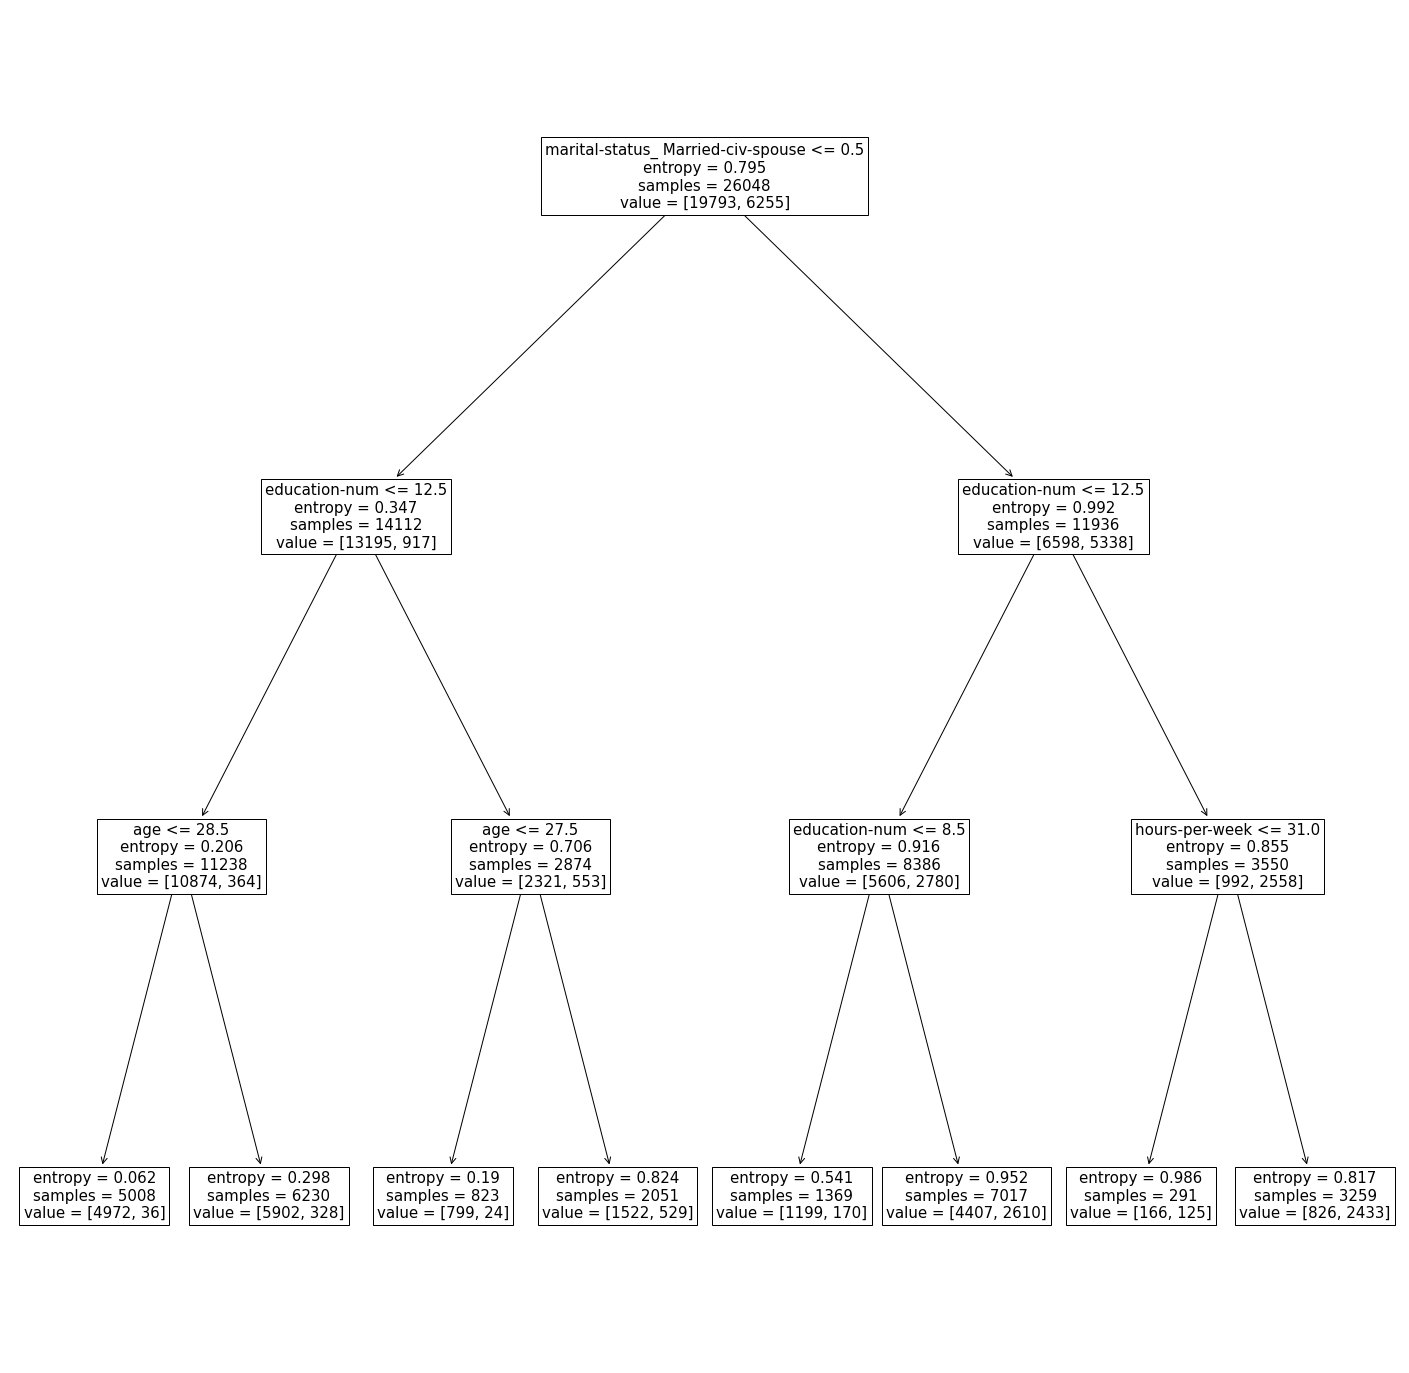

In [ ]:
fig, ax = plt.subplots(figsize=dimensiones)
tree.plot_tree( t, feature_names=X.columns, fontsize=15)
plt.show()

In [ ]:
fig.savefig('tree.png')

# Métricas del modelo

**Matriz de confusión**

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.95      0.89      4926
           1       0.73      0.39      0.51      1586

    accuracy                           0.82      6512
   macro avg       0.78      0.67      0.70      6512
weighted avg       0.80      0.82      0.79      6512



**Curva ROC**

In [ ]:
from sklearn.metrics import roc_auc_score

In [ ]:
roc_auc_score(y_test, y_pred)

0.6715965008481132